### Esto para cambiar las variables a Caregoricas 

In [1]:
#from pandas.api.types import CategoricalDtype

#X = pd.Series(np.random.choice(['foo', 'bar'], size=(10,)))
#X = X.astype(CategoricalDtype(categories=['foo', 'bar']))

# Importar Paquetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# DataFrame df_edu (Nivel educativo del postulante)

In [2]:
df_edu = pd.read_csv('fiuba_1_postulantes_educacion.csv')
df_edu.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [3]:
df_edu["nombre"].unique()

array(['Posgrado', 'Universitario', 'Master', 'Otro', 'Terciario/Técnico',
       'Doctorado', 'Secundario'], dtype=object)

In [4]:
df_edu["estado"].unique()

array(['En Curso', 'Graduado', 'Abandonado'], dtype=object)

In [5]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
nombre          298231 non-null object
estado          298231 non-null object
dtypes: object(3)
memory usage: 6.8+ MB


Text(0,0.5,'nivel educativo')

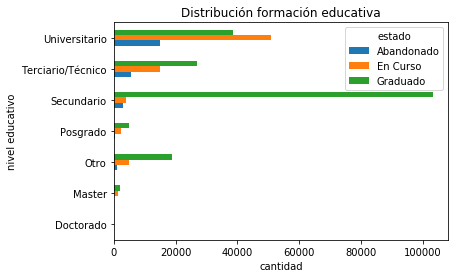

In [6]:
vis1_edu = df_edu.groupby(['nombre','estado']).size().unstack().plot.barh()
vis1_edu.set_title('Distribución formación educativa')
vis1_edu.set_xlabel('cantidad')
vis1_edu.set_ylabel('nivel educativo')

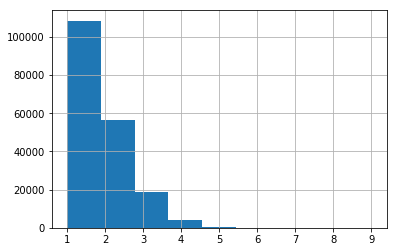

In [7]:
df_edu.groupby(['idpostulante']).size().hist(bins=9)

# DataFrame df_gen_edad

In [8]:
df_gen_edad = pd.read_csv('fiuba_2_postulantes_genero_y_edad.csv')
df_gen_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [9]:
df_gen_edad["sexo"].unique()

array(['FEM', 'MASC', 'NO_DECLARA'], dtype=object)

In [10]:
df_gen_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [11]:
df_gen_edad["fechanacimiento"] = df_gen_edad["fechanacimiento"].dropna().astype('datetime64[ns]')

# Hay que pasar las fechas a edades

sexo
FEM           AxesSubplot(0.125,0.125;0.775x0.755)
MASC          AxesSubplot(0.125,0.125;0.775x0.755)
NO_DECLARA    AxesSubplot(0.125,0.125;0.775x0.755)
Name: fechanacimiento, dtype: object

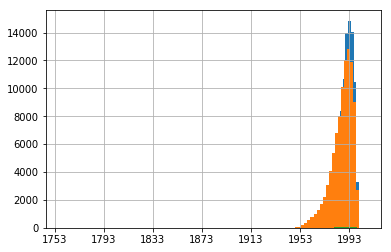

In [12]:
df_gen_edad.groupby('sexo')['fechanacimiento'].hist(bins=100)

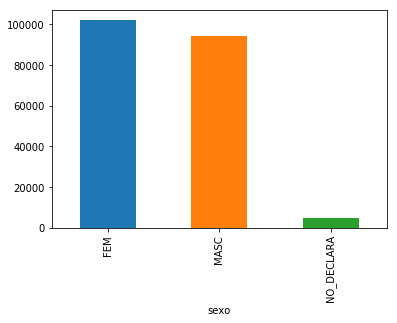

In [13]:
df_gen_edad.groupby('sexo').size().plot.bar()

# DataFrame df_vistas

In [14]:
df_vistas = pd.read_csv('fiuba_3_vistas.csv')
df_vistas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [15]:
df_vistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null object
idpostulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 22.0+ MB


In [16]:
df_vistas['timestamp']=df_vistas['timestamp'].astype('datetime64[ns]')

## Frecuencia de Cantidad de vistas por Anuncio

Podria usarse como una forma de medir cuan nuevos e interesantes son los avisos.
Aparenta tener unos 2000 anuncios nuevos (o muy poco interesantes)

Text(0.5,1,'Cantidad de vistas por Anuncio')

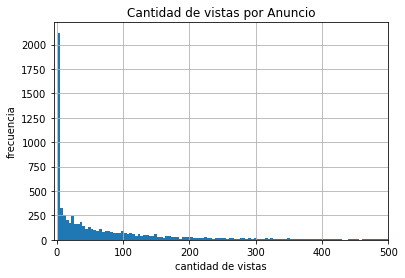

In [17]:
vis1_vistas = df_vistas.groupby('idAviso').size().hist(bins=1000)
vis1_vistas.set_xlim(-5,500);
vis1_vistas.set_xlabel('cantidad de vistas')
vis1_vistas.set_ylabel('frecuencia')
vis1_vistas.set_title('Cantidad de vistas por Anuncio')

## Frecuencia con la que un mismo usuario realiza varias vistas sobre un mismo anuncio

Text(0.5,1,'Repetición de Vistas a un Anuncio por cada Usuarios')

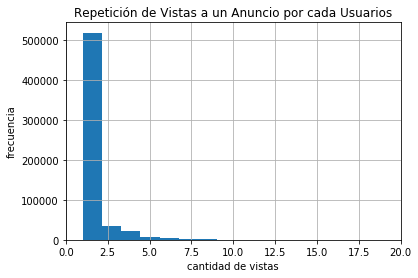

In [18]:
vis2_vistas = df_vistas.groupby(['idAviso','idpostulante']).size().hist(bins=100)
vis2_vistas.set_xlim(0,20);
vis2_vistas.set_xlabel('cantidad de vistas')
vis2_vistas.set_ylabel('frecuencia')
vis2_vistas.set_title('Repetición de Vistas a un Anuncio por cada Usuarios')

## El Ranking de los mas indecisos!!!!! 

Estas son las diez personas que más veces vieron un mismo aviso.

In [19]:
df_vistas.groupby(['idAviso','idpostulante']).size().sort_values(ascending=False).head(10)

idAviso     idpostulante
1112334789  VNeZ482         116
1112268639  DrXRjZK         115
1112352365  GNXeZRp         103
1112337868  1PLkJz           85
1112318442  6rZQPpx          77
1112364686  dYoRZw0          72
1112356687  1PLkJz           70
1112336561  dYoRZw0          70
1112361855  VNrzwPd          63
1112346259  dYoRZw0          63
dtype: int64

## Los avisos más vistos

In [20]:
df_vistas.groupby('idAviso').size().sort_values(ascending=False).head(10)

idAviso
1112363488    4169
1112359836    4120
1112352317    4003
1112366909    3669
1112355872    3472
1112344973    3299
1112369306    3236
1112346591    2979
1112345900    2841
1112334791    2817
dtype: int64

## Los usuario con más vistas

In [21]:
df_vistas.groupby('idpostulante').size().sort_values(ascending=False).head(10)

idpostulante
dYJV5K2    595
8MaQjP3    556
dYoRZw0    521
QNrKkvl    451
DrXRjZK    414
8Mrr8dM    411
E6ZlW8     407
Oqr14Ov    370
5OON3M     351
OqjNZ2x    349
dtype: int64

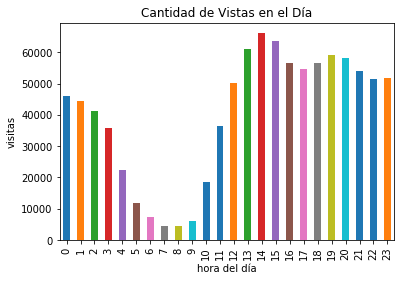

In [22]:
vis3_vistas = df_vistas.groupby(df_vistas['timestamp'].dt.hour).size().plot.bar()
vis3_vistas.set_xlabel('hora del día');
vis3_vistas.set_ylabel('visitas');
vis3_vistas.set_title('Cantidad de Vistas en el Día');

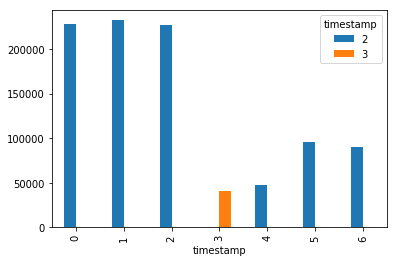

In [23]:
df_vistas.groupby([df_vistas['timestamp'].dt.weekday, df_vistas['timestamp'].dt.month]).size().unstack().plot.bar()

#  Hay que arreglar esto....... el orden de los meses

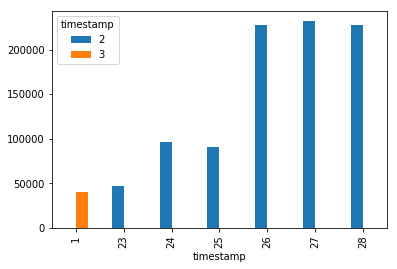

In [24]:
df_vistas.groupby([df_vistas["timestamp"].dt.day, df_vistas["timestamp"].dt.month]).size().unstack().plot.bar()

# DataFrame df_avisos_online

In [25]:
df_avisos_online = pd.read_csv('fiuba_5_avisos_online.csv')
df_avisos_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [26]:
df_avisos_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 1 columns):
idaviso    5028 non-null int64
dtypes: int64(1)
memory usage: 39.4 KB


# DataFrame df_avisos_detalle

In [27]:
df_avisos_detalle = pd.read_csv('fiuba_6_avisos_detalle.csv')
df_avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [28]:
df_avisos_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


In [29]:
df_avisos_detalle["denominacion_empresa"] = df_avisos_detalle["denominacion_empresa"].str.upper()

In [30]:
df_avisos_detalle["denominacion_empresa"].unique()

array(['VENTOR', 'FARMACIAS CENTRAL OESTE', 'FAMITAX SRL', ...,
       'R+ VIAJES Y TURISMO', 'RUBINZAL EDITORIAL',
       'BNP PARIBAS ARGENTINA INVESTMENT PARTNERS S A'], dtype=object)

In [31]:
df_avisos_detalle["denominacion_empresa"].nunique()

2584

In [32]:
df_avisos_detalle["idpais"].unique()

array([1])

In [33]:
df_avisos_detalle["tipo_de_trabajo"].unique()

array(['Full-time', 'Part-time', 'Por Horas', 'Temporario',
       'Fines de Semana', 'Pasantia', 'Teletrabajo', 'Por Contrato',
       'Primer empleo'], dtype=object)

In [34]:
df_avisos_detalle["nivel_laboral"].unique()

array(['Senior / Semi-Senior', 'Junior',
       'Jefe / Supervisor / Responsable', 'Otro',
       'Gerencia / Alta Gerencia / Dirección'], dtype=object)

# Cantidad de avisos por area entre los que la gente se postulo (ya que son los que estan en el detalle de avisos y no son los que estan online

Text(0.5,1,'Cantidad de avisos por area')

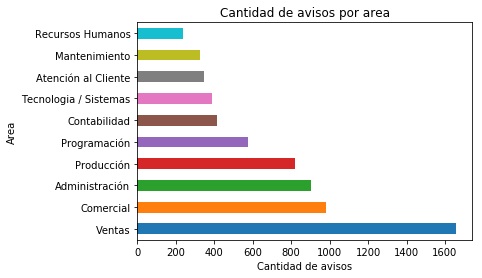

In [35]:
vis1_avisos_detalle = df_avisos_detalle.groupby(["nombre_area"]).size().sort_values(ascending=False).head(10).plot.barh()
vis1_avisos_detalle.set_xlabel('Cantidad de avisos')
vis1_avisos_detalle.set_ylabel('Area')
vis1_avisos_detalle.set_title('Cantidad de avisos por area')

Text(0.5,1,'Distribución por Zona de los Avisos')

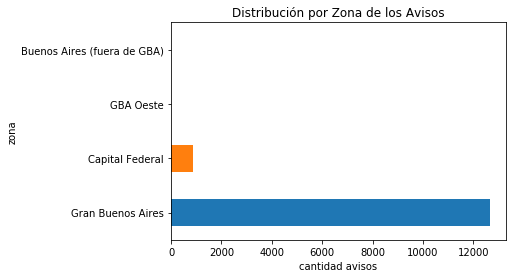

In [36]:
vis2_avisos_detalle = df_avisos_detalle.groupby(["nombre_zona"]).size().sort_values(ascending=False).plot.barh()
vis2_avisos_detalle.set_xlabel('cantidad avisos')
vis2_avisos_detalle.set_ylabel('zona')
vis2_avisos_detalle.set_title('Distribución por Zona de los Avisos')

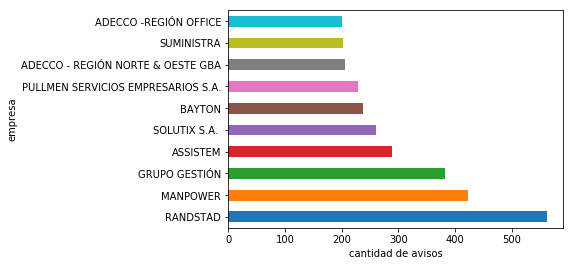

In [37]:
vis3_avisos_detalle = df_avisos_detalle.groupby(["denominacion_empresa"]).size().sort_values(ascending=False).head(10).plot.barh()
vis3_avisos_detalle.set_xlabel('cantidad de avisos')
vis3_avisos_detalle.set_ylabel('empresa')
vis3_avisos_detalle.set_label('Distribución por Empresa de los Avisos')

Text(0.5,0,'Distribución por Nivel Laboral de los Avisos')

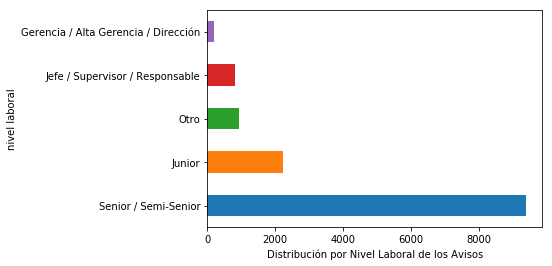

In [38]:
vis4_avisos_detalle = df_avisos_detalle.groupby(["nivel_laboral"]).size().sort_values(ascending=False).plot.barh()
vis4_avisos_detalle.set_xlabel('cantidad de avisos')
vis4_avisos_detalle.set_ylabel('nivel laboral')
vis4_avisos_detalle.set_xlabel('Distribución por Nivel Laboral de los Avisos')

Text(0.5,0,'Distribución por Modalidad de Trabajo de los Avisos')

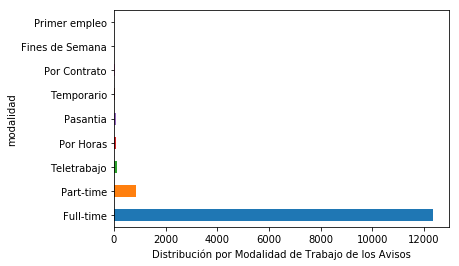

In [39]:
vis5_avisos_detalle = df_avisos_detalle.groupby(["tipo_de_trabajo"]).size().sort_values(ascending=False).plot.barh()
vis5_avisos_detalle.set_xlabel('cantidad de avisos')
vis5_avisos_detalle.set_ylabel('modalidad')
vis5_avisos_detalle.set_xlabel('Distribución por Modalidad de Trabajo de los Avisos')

# DataFrame df_post

In [40]:
df_post = pd.read_csv('fiuba_4_postulaciones.csv')
df_post.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [41]:
df_post["fechapostulacion"] = df_post["fechapostulacion"].astype('datetime64[ns]')

# Aca hay que superponer el de vistas y postulaciones en el día

Text(0,0.5,'postulaciones')

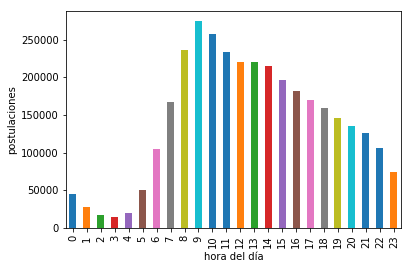

In [42]:
vis1_post = df_post.groupby(df_post["fechapostulacion"].dt.hour).size().plot.bar()
vis1_post.set_xlabel("hora del día")
vis1_post.set_ylabel("postulaciones")

Text(0,0.5,'postulaciones')

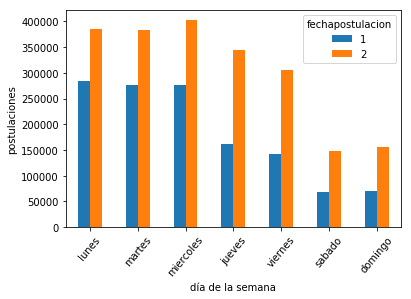

In [43]:
vis2_post = df_post.groupby([df_post["fechapostulacion"].dt.weekday, df_post["fechapostulacion"].dt.month]).size().unstack().plot.bar()
vis2_post.set_xticklabels(["lunes","martes","miercoles","jueves","viernes","sabado","domingo"], rotation=50)
#xdiasemana.set_title("Día de la semana")
vis2_post.set_xlabel("día de la semana")
vis2_post.set_ylabel("postulaciones")

Text(0,0.5,'postulaciones')

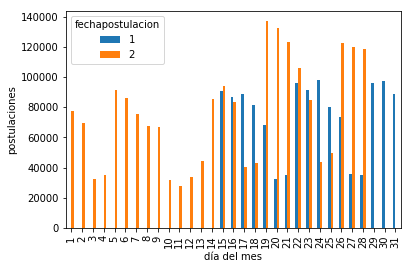

In [44]:
vis3_post = df_post.groupby([df_post["fechapostulacion"].dt.day, df_post["fechapostulacion"].dt.month]).size().unstack().plot.bar()
#xmes.set_title("Día del mes")
vis3_post.set_xlabel("día del mes")
vis3_post.set_ylabel("postulaciones")

## Frecuencia de la cantidad de postulaciones por  postulante

Este grafico no contempla a los usuarios que no se postulan. Solo sonsidera a aquellos que tienen como minimo una postulacion

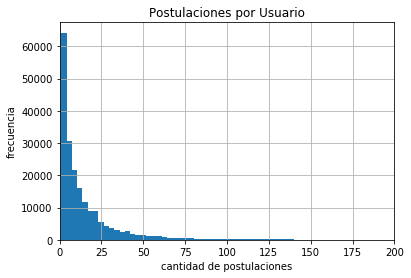

In [45]:
vis4_post = df_post.groupby(["idpostulante"]).size().hist(bins=1000)
vis4_post.set_xlim(0,200);
vis4_post.set_xlabel('cantidad de postulaciones');
vis4_post.set_ylabel('frecuencia');
vis4_post.set_title('Postulaciones por Usuario');

## Los casos de Mayor cantidad de postulaciones

In [46]:
df_post.groupby(["idpostulante"]).size().sort_values(ascending=False).head(10)

idpostulante
axmjOE     3166
6rQdqjl    1773
5Mwjak     1485
8MaQjP3    1414
4rNzLje    1213
KBzm0ZX    1176
NzrpkBD    1099
4rPx4jR    1059
JBmav1r    1030
jk5aQ1b    1013
dtype: int64

# MERGEMERGEMERGEMERGEMERGEMERGEMERGEMERGEMERGE

# MERGEMERGEMERGEMERGEMERGEMERGEMERGEMERGEMERGE

# MERGEMERGEMERGEMERGEMERGEMERGEMERGEMERGEMERGE

# MERGEMERGEMERGEMERGEMERGEMERGEMERGEMERGEMERGE

# Que areas y en que zonas hay mayor cantidad de requerimiento/postulaciones

In [47]:
post_avisos_detalle = pd.merge(df_post, df_avisos_detalle[["idaviso","nombre_area","nombre_zona"]], on=["idaviso"], how='left')

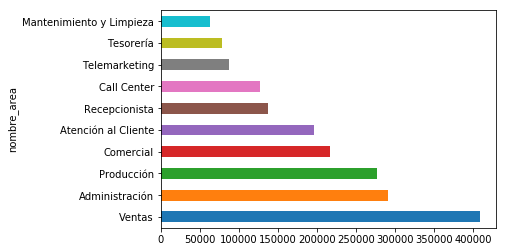

In [48]:
post_avisos_detalle.groupby(["nombre_area"]).size().sort_values(ascending=False).head(10).plot.barh()

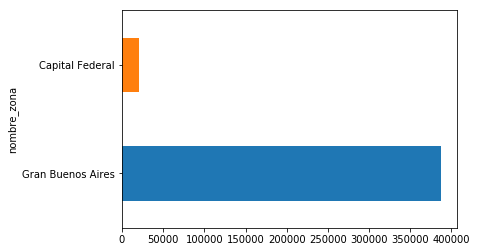

In [49]:
post_avisos_detalle[post_avisos_detalle["nombre_area"]=="Ventas"].groupby("nombre_zona").size().sort_values(ascending=False).plot.barh()

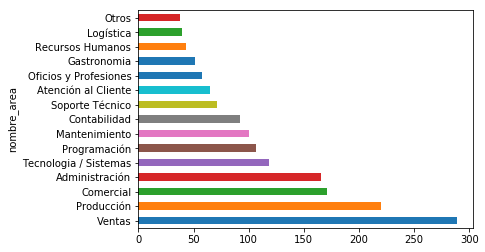

In [50]:
aux3 = pd.merge(df_post[df_post["idpostulante"]=='axmjOE'], df_avisos_detalle[["idaviso","nombre_area","nombre_zona"]], 
         on=['idaviso'], how='left')
aux3.groupby(["nombre_area"]).size().sort_values(ascending=False).head(15).plot.barh()

In [51]:
a = pd.merge(df_post, df_avisos_detalle[["idaviso","nombre_area"]], 
         on=['idaviso'], how='left').groupby(["idpostulante"])["nombre_area"].nunique()#.plot.hist(bins=31,range=(80,180))
b = df_post.groupby(["idpostulante"]).size()

c = a.to_frame().join(b.to_frame())
c.head()

,nombre_area,0
idpostulante,,
0z5VvGv,11,34
0zB026d,1,3
0zB03O9,5,17
0zB08lq,1,1
0zB0NWY,1,1


In [52]:
c["idpostulante"] = c.index

In [53]:
c.head()

,nombre_area,0,idpostulante
idpostulante,,,
0z5VvGv,11,34,0z5VvGv
0zB026d,1,3,0zB026d
0zB03O9,5,17,0zB03O9
0zB08lq,1,1,0zB08lq
0zB0NWY,1,1,0zB0NWY


In [54]:
df_gen_edad[["sexo","idpostulante"]].head()

,sexo,idpostulante
0,FEM,NM5M
1,FEM,5awk
2,FEM,ZaO5
3,MASC,NdJl
4,MASC,eo2p


In [55]:
d = pd.merge(c, df_gen_edad[["sexo","idpostulante"]], on="idpostulante", how='inner')
d.head()

,nombre_area,0,idpostulante,sexo
0,11,34,0z5VvGv,MASC
1,1,3,0zB026d,FEM
2,5,17,0zB03O9,FEM
3,1,1,0zB08lq,MASC
4,1,1,0zB0NWY,FEM


In [56]:
d = d.rename(columns={0:"cant_post", "nombre_area":"cant_area"})

In [57]:
d.columns

Index(['cant_area', 'cant_post', 'idpostulante', 'sexo'], dtype='object')

Text(0,0.5,'Cantidad Areas postuladas')

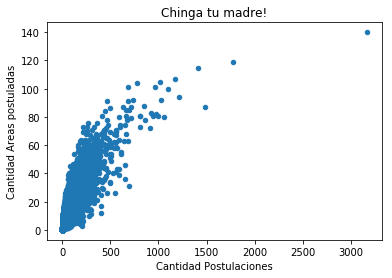

In [68]:
dplot = d.plot(x="cant_post",y="cant_area",kind='scatter')
dplot.set_title("Chinga tu madre!")
#dplot.set_xlim(-1,100)
#dplot.set_ylim(-1,50)
dplot.set_xlabel("Cantidad Postulaciones")
dplot.set_ylabel("Cantidad Areas postuladas")

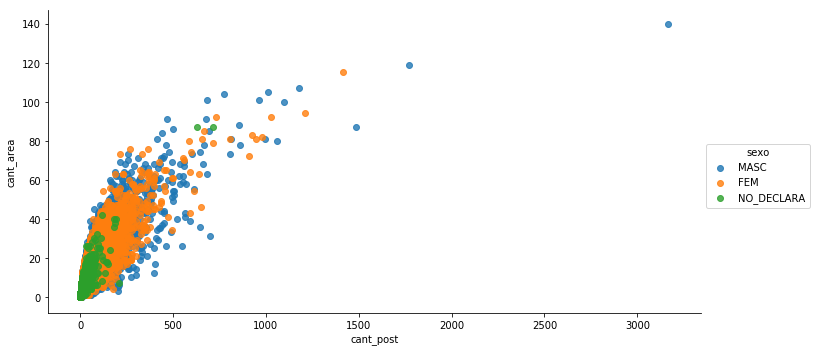

In [100]:
vis = sns.lmplot(data=d, x= "cant_post", y="cant_area", fit_reg=False, hue="sexo", aspect=2)


In [64]:
df_avisos_detalle["nombre_area"].nunique()

173

# Esta mal, hay que colocar la maxima formacion.... No estoy seguro de que funcione bien asi.

In [110]:
dd = pd.merge(c, df_edu[df_edu['estado']=='Graduado'], on="idpostulante", how='inner')
dd.head()

,nombre_area,0,idpostulante,nombre,estado
0,11,34,0z5VvGv,Secundario,Graduado
1,1,3,0zB026d,Secundario,Graduado
2,1,3,0zB026d,Terciario/Técnico,Graduado
3,5,17,0zB03O9,Secundario,Graduado
4,1,1,0zB08lq,Secundario,Graduado


In [111]:
dd = dd.rename(columns={0:"cant_post", "nombre_area":"cant_area"})

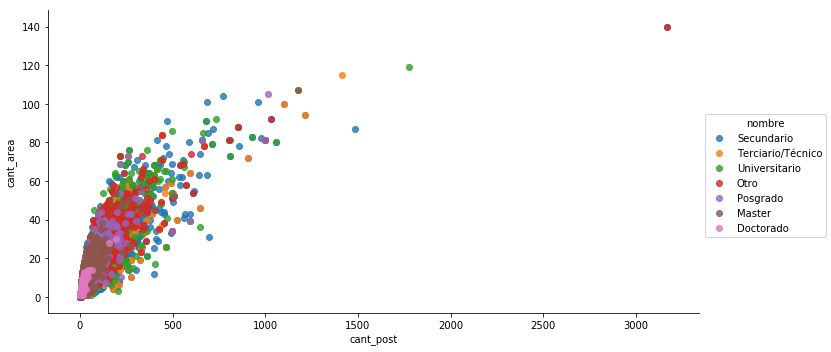

In [112]:
vis = sns.lmplot(data=dd, x= "cant_post", y="cant_area", fit_reg=False, hue="nombre", aspect=2)

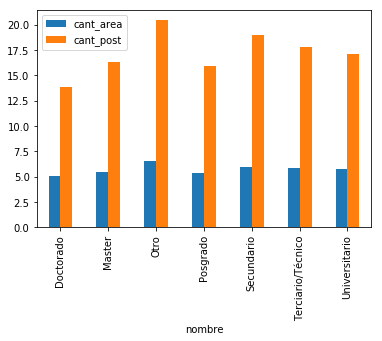

In [113]:
dd.groupby("nombre").mean().plot.bar()

In [65]:
d1 = df_vistas.groupby(["idpostulante"]).size()
d2 = pd.merge(d1.to_frame(), b.to_frame(), left_index=True, right_index=True, how='outer')

In [66]:
d1.head()

idpostulante
0z5VvGv     3
0zB026d     6
0zB03O9    45
0zB0YGv    18
0zB0xL1     2
dtype: int64

In [67]:
b.head()

idpostulante
0z5VvGv    34
0zB026d     3
0zB03O9    17
0zB08lq     1
0zB0NWY     1
dtype: int64

In [68]:
d2.head()

,0_x,0_y
idpostulante,,
0z5VvGv,3.0,34
0zB026d,6.0,3
0zB03O9,45.0,17
0zB08lq,NaN,1
0zB0NWY,NaN,1


In [69]:
d2["idpostulante"]=d2.index

In [70]:
d2.columns

Index(['0_x', '0_y', 'idpostulante'], dtype='object')

In [71]:
d2 = pd.merge(d2, df_gen_edad[["sexo","idpostulante"]], on="idpostulante", how='inner')
d2.head()

,0_x,0_y,idpostulante,sexo
0,3.0,34,0z5VvGv,MASC
1,6.0,3,0zB026d,FEM
2,45.0,17,0zB03O9,FEM
3,NaN,1,0zB08lq,MASC
4,NaN,1,0zB0NWY,FEM


# ACA LAS FECHAS QUE COINCIDEN ENTRE VISITAS Y POSTULACIONES ES DEL 23-2 AL 28-2

Text(0,0.5,'Cantidad Postulaciones')

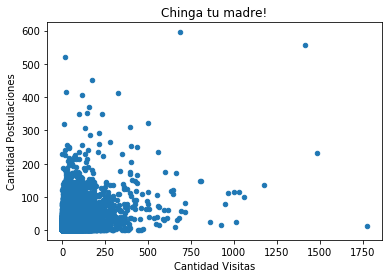

In [72]:
d2plot = d2.plot.scatter(x="0_y",y="0_x")
d2plot.set_title("Chinga tu madre!")
d2plot.set_xlabel("Cantidad Visitas")
d2plot.set_ylabel("Cantidad Postulaciones")

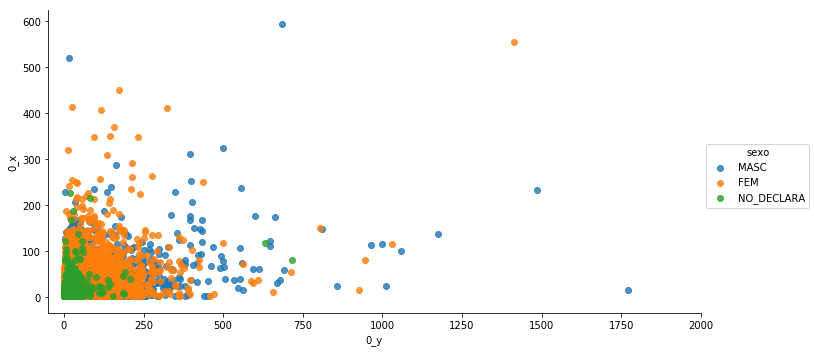

In [73]:
d2_vis = sns.lmplot(data=d2, x= "0_y", y="0_x", fit_reg=False, hue="sexo", aspect=2)
d2_vis.set(xlim=(-50, 2000))

Text(0,0.5,'Cantidad Postulantes')

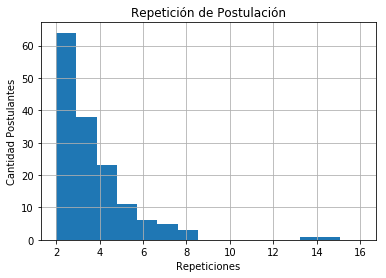

In [74]:
chplot = df_post.groupby(["idpostulante","idaviso"]).size().sort_values(ascending=False).hist(bins=15, range=(2,16))
chplot.set_title("Repetición de Postulación")
chplot.set_xlabel("Repeticiones")
chplot.set_ylabel("Cantidad Postulantes")

In [75]:
d2.count()

0_x              87443
0_y             200888
idpostulante    200888
sexo            200888
dtype: int64

# Alguna cagada me estoy madando me parece.........

In [76]:
df_vistas.describe()

,idAviso
count,9.618970e+05
mean,1.111350e+09
std,2.553639e+07
min,1.585950e+06
25%,1.112311e+09
50%,1.112347e+09
75%,1.112360e+09
max,1.112370e+09


# EDUCACION

In [78]:
edu = pd.merge(df_edu, df_gen_edad, on="idpostulante", how="left")

In [79]:
edu.head()

,idpostulante,nombre,estado,fechanacimiento,sexo
0,NdJl,Posgrado,En Curso,1969-05-09,MASC
1,8BkL,Universitario,En Curso,1976-07-21,FEM
2,1d2B,Universitario,En Curso,1976-02-28,MASC
3,NPBx,Universitario,En Curso,1981-03-09,MASC
4,NPBx,Master,En Curso,1981-03-09,MASC


In [80]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298231 entries, 0 to 298230
Data columns (total 5 columns):
idpostulante       298231 non-null object
nombre             298231 non-null object
estado             298231 non-null object
fechanacimiento    294668 non-null datetime64[ns]
sexo               298231 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 13.7+ MB


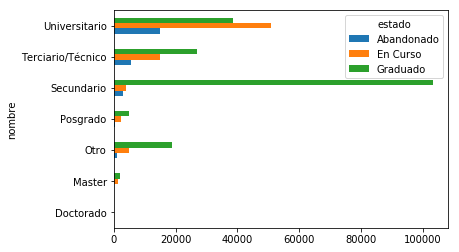

In [81]:
edu.groupby(["nombre","estado"]).size().unstack().plot.barh()

In [82]:
df_avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,FARMACIAS CENTRAL OESTE
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,WURTH ARGENTINA S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [84]:
cant = [0,50,100,200,300,400,500,1000,1500,2000,3000]
teo = []
sigma = []
aux = df_avisos_detalle["nombre_area"]
for m in cant:
    f=[]
    for i in range(500):
        f.append(aux.sample(n=m).nunique())
    teo.append(np.array(f).mean())
    sigma.append(np.array(f).std())        

In [85]:
teo = np.array(teo)
cant = np.array(cant)
sigma = np.array(sigma)

In [86]:
import matplotlib.patches as mpatches

Text(0,0.5,'Cantidad Areas postuladas')

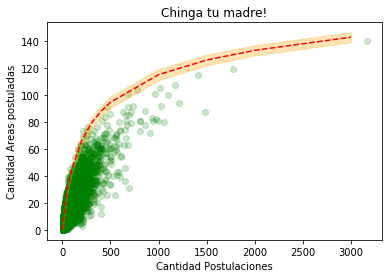

In [87]:
plt.figure()
med = plt.scatter(x=c["cant_post"], y=c["cant_area"], color="green", alpha=0.2)
pred = plt.plot(cant, teo, color='red', linestyle="--")
plt.fill_between(cant, teo-sigma, teo+sigma, color='orange', alpha=0.3)
#plt.legend([med, pred],["Usuario", "Random_Sim"])
plt.title("Chinga tu madre!")
#cplot.set_xlim(-1,100)
#cplot.set_ylim(-1,50)
plt.xlabel("Cantidad Postulaciones")
plt.ylabel("Cantidad Areas postuladas")